**INSTALL PACKAGES AND IMPORT THEM**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yellowbrick


**LOAD DATA**

In [2]:
def load_data():
  global df
  try: 
    df = pd.read_csv("../src/preprocessed.csv")
  except FileNotFoundError:
    from google.colab import drive
    drive.mount('/content/drive')
    df=pd.read_csv('/content/drive/MyDrive/MD/Laboratori/Practica 2/data/smoking.csv')

In [3]:
load_data()


In [4]:
df.head()

,age,height(cm),weight(kg),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,fasting blood sugar,Cholesterol,triglyceride,HDL,hemoglobin,Urine protein,serum creatinine,ALT,Gtp,dental caries,tartar,smoking
0,40,155,60,1.2,1.0,1.0,1.0,114.0,94.0,215.0,82.0,73.0,12.9,1.0,0.7,19.0,27.0,False,True,False
1,40,160,60,0.8,0.6,1.0,1.0,119.0,130.0,192.0,115.0,42.0,12.7,1.0,0.6,19.0,18.0,False,True,False
2,55,170,60,0.8,0.8,1.0,1.0,138.0,89.0,242.0,182.0,55.0,15.8,1.0,1.0,16.0,22.0,False,False,True
3,40,165,70,1.5,1.5,1.0,1.0,100.0,96.0,322.0,254.0,45.0,14.7,1.0,1.0,26.0,18.0,False,True,False
4,40,155,60,1.0,1.0,1.0,1.0,120.0,80.0,184.0,74.0,62.0,12.5,1.0,0.6,14.0,22.0,False,False,False


In [5]:
# Spliting dataset into train and test
from sklearn.model_selection import train_test_split
X = df.drop(columns=['smoking'], axis=1)
Y = df['smoking']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
print("Percentage of examples of the smaller class (class Smoking == True): {0:.2f}%".format(100*np.sum(Y==1)/(np.sum(Y==0)+np.sum(Y==1))))

Percentage of examples of the smaller class (class Smoking == True): 37.36%


<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


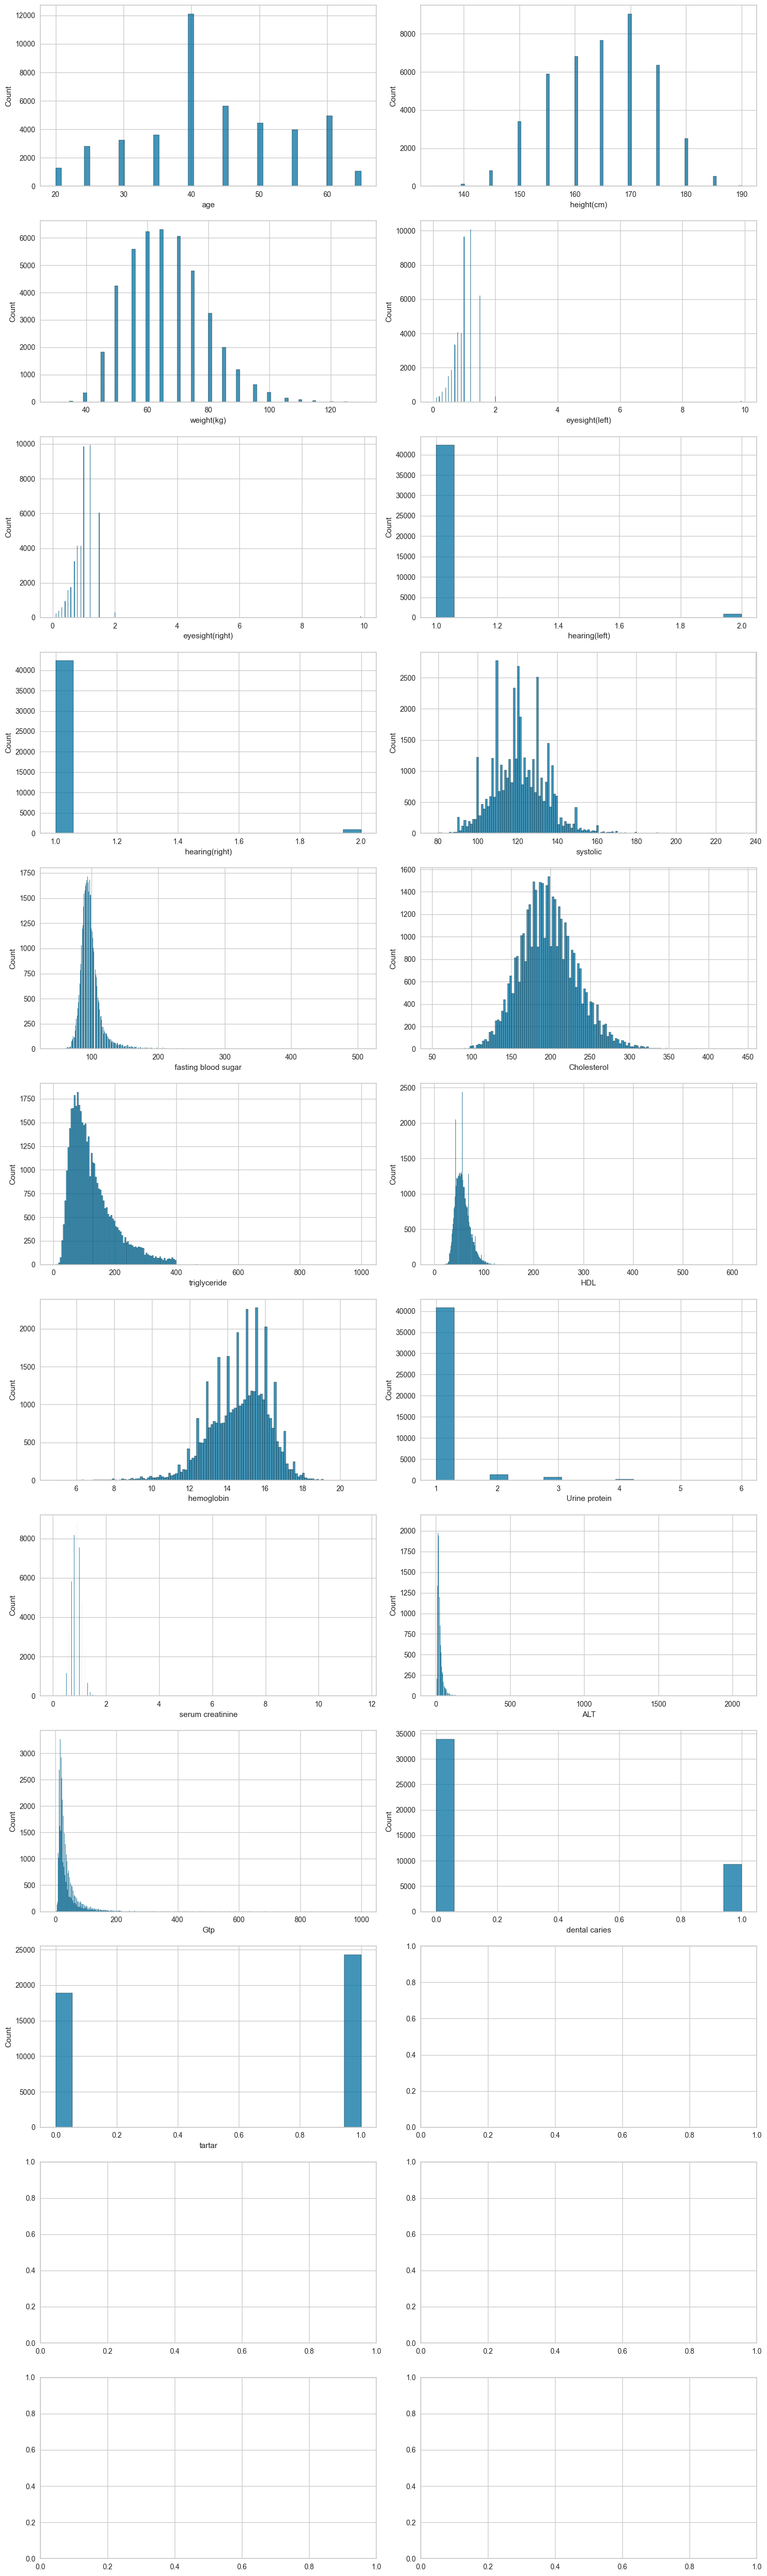

In [6]:
fig, axes = plt.subplots(12,2,figsize=(15,50))
X_train_frame = pd.DataFrame(X_train)
X_train_frame.columns=X.columns
for i, c in enumerate(X.columns):
    ax = axes.reshape(-1)[i]
    if X_train_frame[c].dtype.kind == 'O':
        a = sns.countplot(x=c,data=X_train_frame,ax=ax)
    else:
        b = sns.histplot(x=c,data=X_train_frame,ax=ax)
plt.tight_layout()

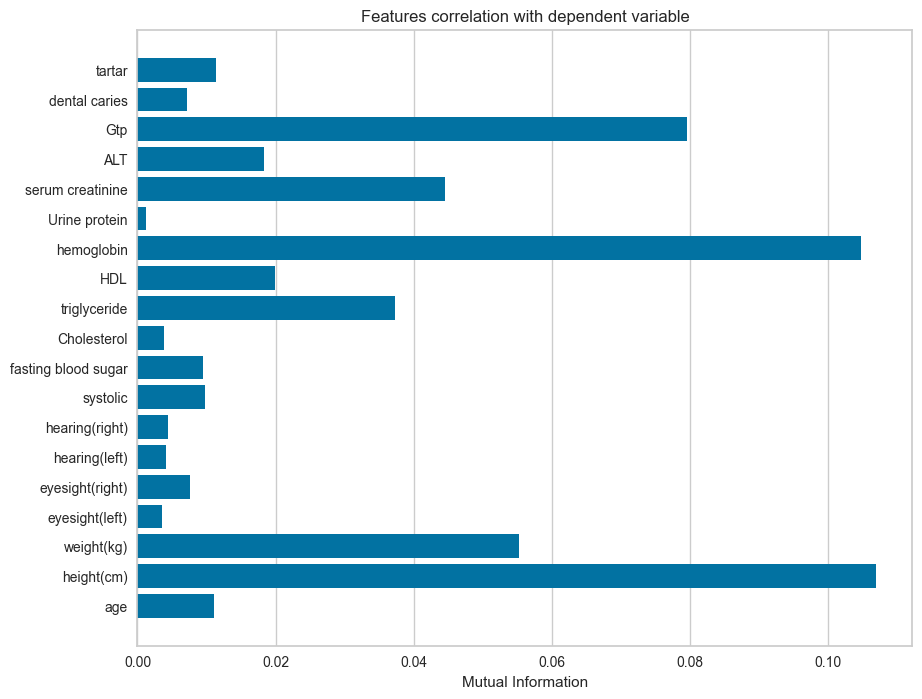

In [7]:
from yellowbrick.target.feature_correlation import feature_correlation
plt.figure(figsize=(10,8))
visualizer = feature_correlation(X_train, Y_train, labels=list(X_train.columns),method='mutual_info-classification');

In [8]:
## normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_n = scaler.fit_transform(X_train)
X_test_n = scaler.transform(X_test)

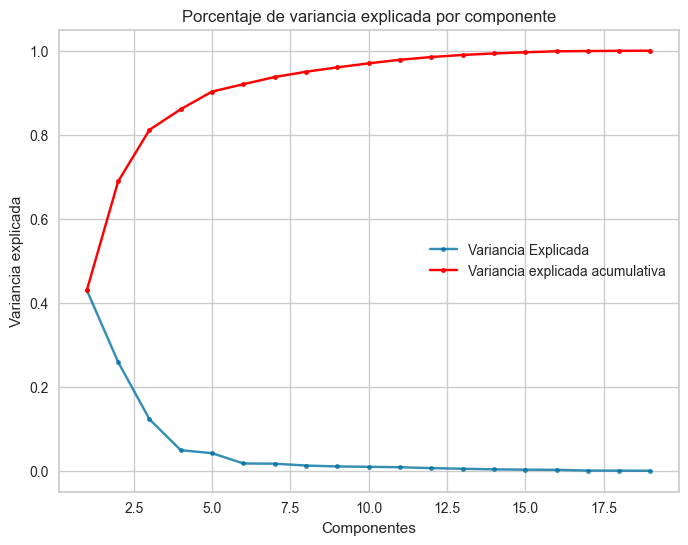

In [9]:
## permorm PCA
from sklearn.decomposition import PCA
pca = PCA().fit(X_train_n)

fig = plt.figure(figsize=(8,6));
plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),pca.explained_variance_ratio_ ,alpha=0.8,marker='.',label="Variancia Explicada");
y_label = plt.ylabel('Variancia explicada');
x_label = plt.xlabel('Componentes');
plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),
         np.cumsum(pca.explained_variance_ratio_),
         c='red',marker='.',
         label="Variancia explicada acumulativa");
plt.legend();
plt.title('Porcentaje de variancia explicada por componente');

/usr/local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


<Axes: >

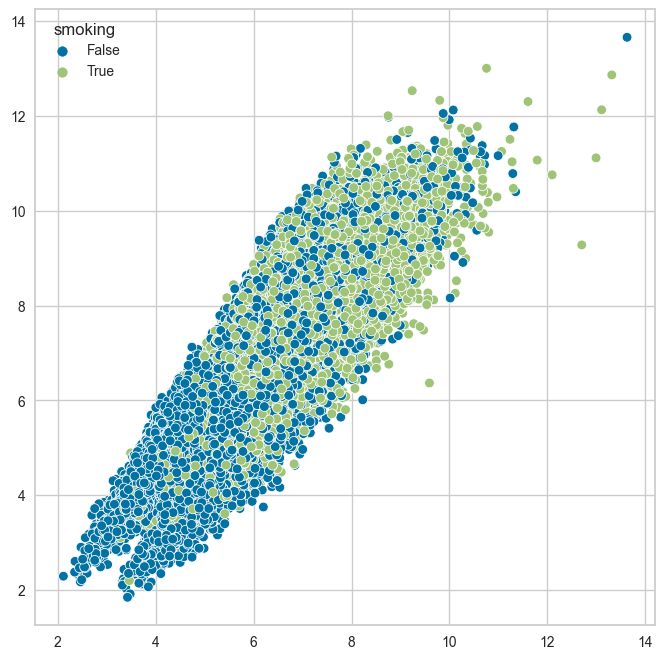

In [10]:
X_trans = pca.transform(X_train)
plt.figure(figsize=(8,8));
sns.scatterplot(x=X_trans[:,0], y=X_trans[:,1], hue=Y_train)